<h1><center>Data Analysis</center></h1>
<h2><center>Kaggle report notebook</center></h2>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import nltk
import re, string, json
from nltk.corpus import stopwords
from tqdm import tqdm
from pymystem3 import Mystem
from itertools import chain
from collections import Counter
import ast
sys.path.append('~/data/')

tqdm.pandas()

In [ ]:
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Introduce yourself

Put your team name and team-members' names below

Team name is 🏳️‍🌈.

Team members:
- Stas Don
- Mikhail Nosovskiy
- Kirill Shakin

# Data Loading

In [ ]:
df = pd.read_csv('./data/train.tsv.gz', sep='\t', index_col=0)
df_test = pd.read_csv('./data/test_nolabel.tsv.gz', sep='\t', index_col=0)
df_test.loc[:, 'date_created'] = pd.to_datetime(df_test.date_created)
df_test['month'] = df_test.date_created.dt.month
df_test['day'] = df_test.date_created.dt.day

In [109]:
df.columns

Index(['category_id', 'city', 'date_created', 'delivery_available',
       'desc_text', 'img_num', 'lat', 'long', 'name_text', 'owner_id',
       'payment_available', 'price', 'product_id', 'product_type',
       'properties', 'region', 'sold_mode', 'subcategory_id', 'sold_fast'],
      dtype='object')

# Exploratory Data Analysis (EDA)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351281 entries, 1 to 508548
Data columns (total 19 columns):
category_id           351281 non-null int64
city                  351281 non-null object
date_created          351281 non-null object
delivery_available    351281 non-null bool
desc_text             351281 non-null object
img_num               351281 non-null int64
lat                   351281 non-null float64
long                  351281 non-null float64
name_text             351281 non-null object
owner_id              351281 non-null object
payment_available     351281 non-null bool
price                 351281 non-null float64
product_id            351281 non-null object
product_type          351281 non-null int64
properties            351281 non-null object
region                351281 non-null object
sold_mode             351281 non-null int64
subcategory_id        351281 non-null int64
sold_fast             351281 non-null int64
dtypes: bool(2), float64(3), int64(6), ob

In [111]:
df.shape

(351281, 19)

In [112]:
df.isna().any()

category_id           False
city                  False
date_created          False
delivery_available    False
desc_text             False
img_num               False
lat                   False
long                  False
name_text             False
owner_id              False
payment_available     False
price                 False
product_id            False
product_type          False
properties            False
region                False
sold_mode             False
subcategory_id        False
sold_fast             False
dtype: bool

В данных нет нанов.

In [113]:
df = df.dropna()
df.shape

(351281, 19)

In [114]:
df.head()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0


## Categories

### product_type

In [115]:
df.product_type.value_counts()

1    344224
5      7056
8         1
Name: product_type, dtype: int64

In [116]:
df[df.product_type == 5].head(2)

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
80,23,Новолакское,2018-03-17,False,Полный люкс срочно ТОРГ !!!!,5,43.0973,47.4453,"ВАЗ (Lada) Kalina, 2008",4b0d2252e388b9bed3b0776f5b120130,False,140000.0,06f99682a80de9526ea961eefc132331,5,"[{'slug_id': 'auto_body', 'slug_name': 'Тип ку...",Дагестан,1,2301,0
91,23,Москва,2018-02-14,False,"Машина в отличном состоянии, магнитола с двд, ...",4,55.7537,37.6199,"Mazda CX-5, 2014",47d2b433e5ed6806559eed11e2e44789,False,820000.0,c16075eaebdd3da76d3ea688cfe4f1dc,5,"[{'slug_id': 'auto_engine_power', 'slug_name':...",Московская область,1,2301,0


In [117]:
df[df.product_type == 1].head(2)

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0


In [118]:
df[df.product_type == 8].head(2)

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast
395799,24,Москва,2018-08-10,False,Обязанности: поиск оптовых и оптово-розничных ...,1,55.7701,37.6069,Менеджер по продажам,990c437771e99f6dcdb1a1455b07102e,False,50000.0,19d8a46bfc4a5563a16ede823e260e7c,8,"[{'slug_id': 'vacancy_advert_type', 'slug_name...",Московская область,1,2414,1


5 — тачки = 7056  
8 — работа = 1  
1 — все остальное = 344224

In [119]:
df_test.product_type.value_counts()

1    87824
5     1426
7        1
Name: product_type, dtype: int64

###  time distribution

In [ ]:
a = df.groupby('date_created').sold_fast.mean().reset_index()
plt.scatter(a.date_created, a.sold_fast)

In [ ]:
idx = (a.date_created.dt.month >= 8) & (a.date_created.dt.month < 10)
plt.scatter(a.date_created[idx], a.sold_fast[idx])
idx = (a.date_created.dt.month >= 8) & (a.date_created.dt.month < 10)
plt.scatter(a.date_created[idx], a.sold_fast[idx])

There is a huge drop in sales between 8 and 9 months

### category_id

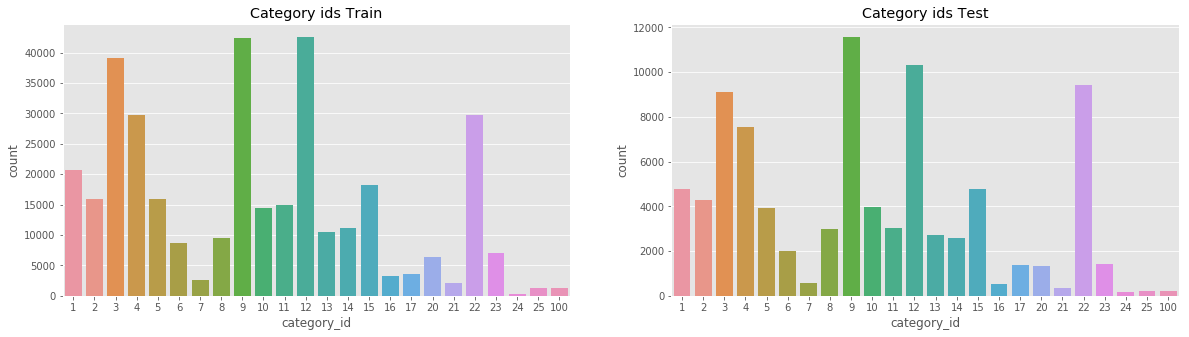

In [120]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.countplot(df.category_id)
plt.title('Category ids Train')

plt.subplot(1,2,2)
sns.countplot(df_test.category_id)
plt.title('Category ids Test')

plt.show()

In [121]:
unique_train = set(df.category_id.unique())
unique_test = set(df_test.category_id.unique())

In [122]:
unique_train - unique_test

set()

В тесте нет категорий, которых нет в трейне.
Распределение категории примерно одинаковое.

In [123]:
df.category_id.value_counts()

12     42589
9      42390
3      39089
22     29811
4      29676
1      20702
15     18154
2      15883
5      15864
11     14909
10     14498
14     11211
13     10478
8       9514
6       8751
23      7056
20      6417
17      3591
16      3190
7       2544
21      2024
25      1356
100     1317
24       267
Name: category_id, dtype: int64

In [124]:
df_test.category_id.value_counts()

9      11573
12     10317
22      9443
3       9120
4       7560
1       4785
15      4778
2       4288
10      3949
5       3913
11      3037
8       2969
13      2725
14      2604
6       2023
23      1426
17      1357
20      1325
7        580
16       534
21       364
100      216
25       208
24       157
Name: category_id, dtype: int64

### subcategory_id

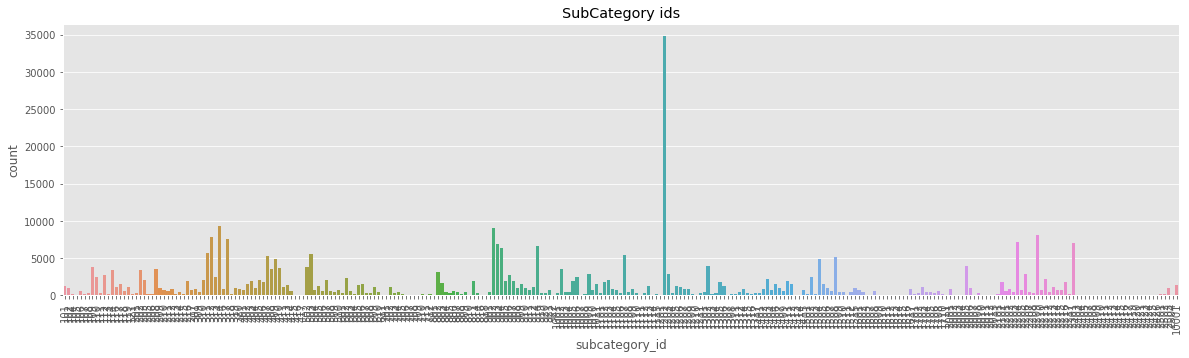

In [125]:
plt.figure(figsize=(20, 5))
sns.countplot(df.subcategory_id)
plt.title('SubCategory ids')
plt.xticks(rotation=90)
plt.show()

In [126]:
unique_train = set(df.subcategory_id.unique())
unique_test = set(df_test.subcategory_id.unique())

In [127]:
unique_train - unique_test

{102, 104, 105, 106, 107, 114, 116, 117, 611, 1414, 2405}

In [128]:
unique_test - unique_train

{817, 2401, 2427}

Подкатегории не полностью пересекаются.

In [129]:
df.subcategory_id.value_counts()

1202    34762
314      9309
902      9036
2209     8116
312      7854
317      7495
2204     7224
2301     7056
903      6892
914      6572
904      6387
311      5647
503      5571
1107     5434
407      5331
1508     5115
1504     4938
409      4906
2005     3898
1302     3898
502      3855
109      3772
410      3731
1002     3548
208      3492
408      3479
202      3463
114      3450
802      3113
2206     2863
        ...  
1609       26
2419       24
2013       23
1616       23
1114       22
1414       22
2415       21
2412       18
708        18
2425       16
2417       15
2010       15
2424       14
2421       13
2407       13
2416       12
611         9
2408        8
2011        6
2404        6
2410        5
2413        4
2405        4
2409        4
2411        4
2426        2
2012        1
818         1
2420        1
2403        1
Name: subcategory_id, Length: 281, dtype: int64

### properties

Возможно, оттуда можно вытащить норм фичи в разрезе категории/подкатегории, но там некоторые неудобства из-за лишних символов в теле json

In [130]:
df['properties_str'] = df.properties.apply(lambda x: ' '.join([y['value'] for y in eval(x)]))

In [131]:
df.head()

,category_id,city,date_created,delivery_available,desc_text,img_num,lat,long,name_text,owner_id,payment_available,price,product_id,product_type,properties,region,sold_mode,subcategory_id,sold_fast,properties_str
1,4,Краснодар,2018-10-08,False,"Продаю стол раскладной, деревянный, советский ...",3,45.0686,38.9518,Стол,4ce583fe8231a0cc4a3c7d241c7d0289,True,500.0,8cb80c05c65c210275f5500779d6b593,1,"[{'slug_id': 'stoly_stulya_tip', 'slug_name': ...",Краснодарский край,1,410,1,Столы
2,4,Тюмень,2018-06-18,False,"Тарелки глубокие 6 шт. Блюдца, чашки по 6 шт. ...",2,57.1840,65.5674,Посуда,e58be2c8f143c17246dc2243b5d3b98f,False,300.0,3b7a9f8b27a53b63525f95bc8070abb2,1,"[{'slug_id': 'dom_dacha_posuda_tip', 'slug_nam...",Тюменская область,1,405,0,Тарелки
4,9,Омск,2018-07-31,True,"Новый,с этикеткой. Размер L. Не подошёл по раз...",1,54.9889,73.4312,Костюм,51b408796027214232532b7e478e2159,True,1100.0,c97dd9c5a3e938c52cf5d7822bc0eb7b,1,[{'slug_id': 'zhenskaya_odezhda_pidzhaki_kosty...,Омская область,1,908,0,Костюмы с юбкой 46-48 (L)
6,3,Санкт-Петербург,2018-04-17,False,"Складывается тростью, все колеса вниз. Сплошна...",4,59.9590,30.4877,Коляска,6544b83acbbf04439a7ba983093cafb4,True,5000.0,3e5d0286b25fd7f62f88bc436a59ae4e,1,"[{'slug_id': 'waggon_type', 'slug_name': 'Тип'...",Ленинградская область,1,312,0,Прогулочная До 3 лет
10,5,Москва,2018-02-09,False,"Неразлучники, птичкам по 1,5 года. Продаю с бо...",2,55.6473,37.4118,Волнистые попугаи,ea575e28daf1f47bfce63015cd3ce5cf,True,2000.0,57b4a8679d0d3eb1e31367b57221098f,1,[],Московская область,1,504,0,


### name_text

In [132]:
top_names_in_cat = df.groupby('category_id').name_text.apply(lambda x: x.value_counts()[:5]).reset_index()
top_names_in_cat.columns = ['category_id', 'name_text', 'cnt']

In [133]:
top_names_in_cat['sold_fast_cnt'] = 0

In [134]:
for idx, row in top_names_in_cat.iterrows():
    fast_sold_cnt = df[(df.category_id==row.category_id) & (df.name_text == row.name_text)].sold_fast.sum()
    top_names_in_cat.loc[idx, 'sold_fast_cnt'] = fast_sold_cnt

In [135]:
top_names_in_cat['sold_fast_perc'] = top_names_in_cat.sold_fast_cnt/top_names_in_cat.cnt

In [136]:
for cat in top_names_in_cat.category_id.unique():
    print(top_names_in_cat[top_names_in_cat.category_id == cat])

   category_id  name_text  cnt  sold_fast_cnt  sold_fast_perc
0            1       Шины  302             56        0.185430
1            1      Диски  149             31        0.208054
2            1     Колеса  116             29        0.250000
3            1  Велосипед  114             35        0.307018
4            1  Магнитола   92             18        0.195652
   category_id           name_text   cnt  sold_fast_cnt  sold_fast_perc
5            2         Холодильник  1065            483        0.453521
6            2   Стиральная машина   716            306        0.427374
7            2  Стиральная машинка   298            117        0.392617
8            2       Газовая плита   270             95        0.351852
9            2             Пылесос   205             69        0.336585
    category_id               name_text  cnt  sold_fast_cnt  sold_fast_perc
10            3                 Коляска  967            235        0.243020
11            3                 Ходунки  664

### Feature lists

In [137]:
df.nunique()

category_id               24
city                    2299
date_created             289
delivery_available         2
desc_text             333976
img_num                   20
lat                    74798
long                  109704
name_text             212239
owner_id              305336
payment_available          2
price                   2861
product_id            351281
product_type               3
properties             89835
region                   109
sold_mode                  2
subcategory_id           281
sold_fast                  2
properties_str         87937
dtype: int64

In [138]:
float_features = list(df.columns[df.dtypes == float])
int_features = list(df.columns[df.dtypes == int])
bool_features = list(df.columns[df.dtypes == bool])
obj_features = list(df.columns[df.dtypes == object])

In [139]:
bool_list = []
num_list = []
cat_list = []
date_list = []
text_list = []

# Это айдишники, надо будет посмотреть встречаются ли в тесте такие же как в трейне, 
# мб это поможет как то, но пока хочу дропнуть
possible_dust_list = []

#### Look at features by types

##### Float

In [140]:
df[float_features].nunique()

lat       74798
long     109704
price      2861
dtype: int64

##### Int

In [141]:
df[int_features].nunique()

category_id        24
img_num            20
product_type        3
sold_mode           2
subcategory_id    281
sold_fast           2
dtype: int64

##### Bool

In [142]:
df[bool_features].nunique()

delivery_available    2
payment_available     2
dtype: int64

##### Object

In [143]:
df[obj_features].nunique()

city                2299
date_created         289
desc_text         333976
name_text         212239
owner_id          305336
product_id        351281
properties         89835
region               109
properties_str     87937
dtype: int64

In [144]:
bool_list = bool_list + ['sold_mode', 'sold_fast'] 
cat_list = cat_list + ['subcategory_id']
num_list = num_list + ['lat', 'long', 'price']

In [145]:
cat_list = cat_list + ['category_id', 'product_type']
num_list = num_list + [ 'img_num']

In [146]:
bool_list = bool_list + ['delivery_available', 'payment_available']

In [147]:
possible_dust_list = ['product_id', 'owner_id']
date_list = date_list + ['date_created']
text_list = text_list + ['desc_text', 'name_text', 'properties']
cat_list = cat_list + ['city', 'region']

Validate length

In [148]:
length = len(possible_dust_list) + len(date_list) + len(text_list) + len(bool_list) + len(cat_list) + len(num_list)
length

19

#### Try dimension reduction

In [149]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [150]:
temp_feats = temp.drop('sold_fast', axis=1)

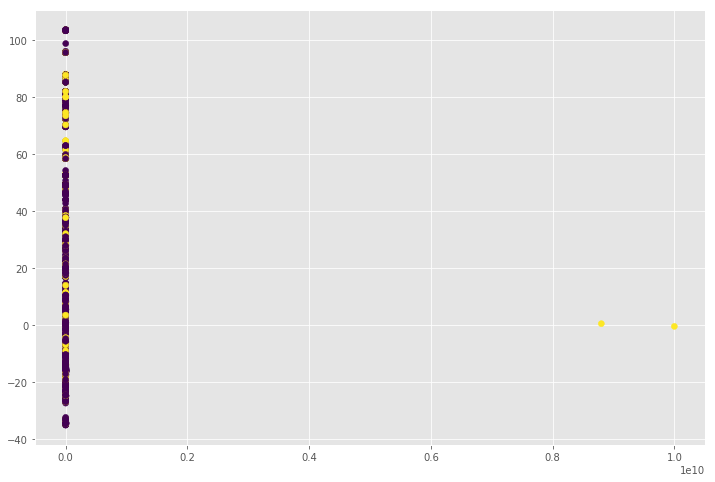

In [156]:
pca = PCA(n_components=2)
pca_feats = pca.fit_transform(temp_feats[num_list])
plt.scatter(pca_feats[:, 0], pca_feats[:, 1], c=temp.sold_fast)

__Идеи:__  
- `date` — ну как обычно
- `text` — можно собрать в одну колонку например и запустить текстовый пайплайн с tfidf
- `possible dust` — надо смотреть тест и есть ли повторы
- `lat long` — можно попробовать поискать кластеры=районы и делать по модели на район как в `house pricing`

### Preprocess texts

In [162]:
russian_stopwords = stopwords.words("russian")
mystem = Mystem()

#### Get price from description

In [163]:
df.loc[:, "desc_price"] = df.desc_text.str.extract(u"([0-9,. ]+) руб", expand=False)
df_test.loc[:, "desc_price"] = df_test.desc_text.str.extract(u"([0-9,. ]+) руб", expand=False)

In [164]:
df.loc[:, "desc_price"] = df.desc_price.str.extract(u"([0-9]+)", expand=False)
df_test.loc[:, "desc_price"] = df_test.desc_price.str.extract(u"([0-9]+)", expand=False)

In [165]:
df.loc[:, "has_desc_price"] = df.desc_price.notnull().astype(int)
df_test.loc[:, "has_desc_price"] = df_test.desc_price.notnull().astype(int)

#### Get name and desc lengths before preproc

In [166]:
df.loc[:, "init_title_len"] = df.name_text.map(len)
df_test.loc[:, "init_title_len"] = df_test.name_text.map(len)


df.loc[:, "init_description_len"] = df.desc_text.map(len)
df_test.loc[:, "init_description_len"] = df_test.desc_text.map(len)

#### Preproc

In [167]:
def preprocess(text):
    # to lower case
    text_preproc = text.lower()
    
    # remove punctuation 
    text_preproc = re.sub('[%s«»]' % re.escape(string.punctuation), ' ', text_preproc)
    
    # remove numbers
#     text_preproc = re.sub(r'\d', ' ', text_preproc)
    
    # remove stopwords
    text_preproc = ' '.join([w for w in text_preproc.split('\W+') if w not in russian_stopwords])
    
    text_preproc = re.sub('\W+', ' ', text_preproc)
    
    return text_preproc

In [168]:
df.loc[:, "pdesc"] = df.desc_text.map(preprocess)
df_test.loc[:, "pdesc"] = df_test.desc_text.map(preprocess)

In [169]:
df.loc[:, "pname"] = df.name_text.map(preprocess)
df_test.loc[:, "pname"] = df_test.name_text.map(preprocess)

In [170]:
df['properties_str'] = df.properties.apply(lambda x: ' '.join([y['value'] for y in eval(x)]))
df_test['properties_str'] = df_test.properties.apply(lambda x: ' '.join([y['value'] for y in eval(x)]))

In [171]:
df.loc[:, "name+desc"] = df.name_text + ' ' + df.desc_text
df_test.loc[:, "name+desc"] = df_test.name_text + ' ' + df_test.desc_text

#### Correlations

In [172]:
df[['date_created', 'delivery_available', 'img_num', 'payment_available', 'price', 'sold_mode']].corrwith(df.sold_fast)

delivery_available    0.005325
img_num              -0.030321
payment_available     0.006845
price                 0.006291
sold_mode             0.011726
dtype: float64

#### Look at items/category

In [173]:
df.groupby('category_id').price.apply(len)

category_id
1      20702
2      15883
3      39089
4      29676
5      15864
6       8751
7       2544
8       9514
9      42390
10     14498
11     14909
12     42589
13     10478
14     11211
15     18154
16      3190
17      3591
20      6417
21      2024
22     29811
23      7056
24       267
25      1356
100     1317
Name: price, dtype: int64

#### Look at lat/long

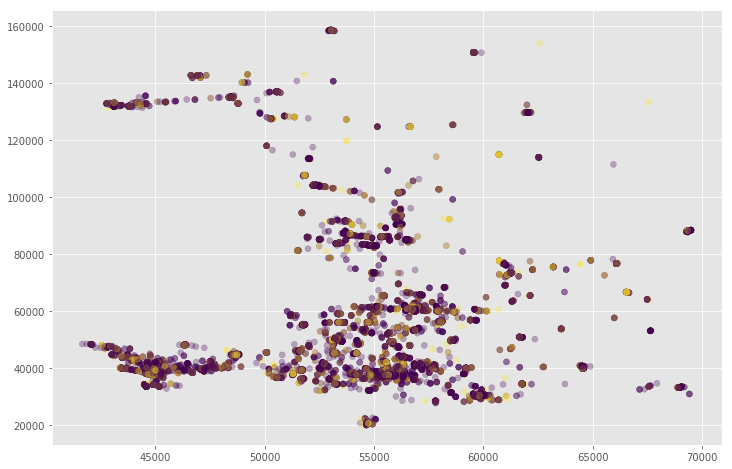

In [174]:
temp = df.iloc[np.random.randint(0, len(df), 50000)]
plt.scatter(temp.lat*1000, temp.long*1000, c=temp.sold_fast, alpha=0.3)

### Lemmatize texts

In [ ]:
import requests
mapping_url = \
    'https://raw.githubusercontent.com/akutuzov/universal-pos-tags/4653e8a9154e93fe2f417c7fdb7a357b7d6ce333/ru-rnc.map'

mystem2upos = {}
r = requests.get(mapping_url, stream=True)
for pair in r.text.split('\n'):
    pair = pair.split()
    if len(pair) > 1:
        mystem2upos[pair[0]] = pair[1]

In [ ]:
def tag_mystem(text, mapping=None, postags=True):

    processed = mystem.analyze(text)
    tagged = []
    for w in processed:
        try:
            
            lemma = w["analysis"][0]["lex"].lower().strip()
            pos = w["analysis"][0]["gr"].split(',')[0]
            pos = pos.split('=')[0].strip()
            if mapping:
                if pos in mapping:
                    pos = mapping[pos] 
                else:
                    pos = 'X'  # на случай, если попадется тэг, которого нет в маппинге
#             tagged.append(lemma.lower() + '_' + pos)
            tagged.append(lemma.lower())


        except Exception:
#             print(w)
#             print(w["analysis"])
            continue
    if not postags:
        tagged = [t.split('_')[0] for t in tagged]
    return tagged

In [ ]:
def get_lemma_vocabulary(texts):
    words = set()
    list_texts = []
    for text in tqdm(texts):
        tokens = tag_mystem(text=text, mapping=mystem2upos)
        list_texts.append(" ".join(tokens))
        words = words.union(set(tokens))
        
    return list_texts, words

In [ ]:
%%time
list_texts, vocab = get_lemma_vocabulary(list(df.pdesc))

In [ ]:
df.loc[:, "ldesc"] = list_texts

In [ ]:
%%time
list_texts, vocab = get_lemma_vocabulary(list(df_test.pdesc))

In [ ]:
df_test.loc[:, "ldesc"] = list_texts

In [ ]:
%%time
list_texts, vocab = get_lemma_vocabulary(list(df.pname))

In [ ]:
df.loc[:, "lname"] = list_texts

In [ ]:
%%time
list_texts, vocab = get_lemma_vocabulary(list(df_test.pname))

In [ ]:
df_test.loc[:, "lname"] = list_texts

## Most common words

In [194]:
def most_common_words(words, n):
    n_common_words = Counter(words).most_common(n)
    cnts = [wrd[0] for wrd in n_common_words]
    return cnts


split_func = lambda x: str(x).split()
chain_func = lambda x: (chain(*map(split_func, x)))

In [ ]:
comm_words = df.groupby('sold_fast').pdesc.apply(lambda x: most_common_words(list(chain_func(x)), 30))
comm_words = comm_words.to_dict()

In [ ]:
for k, w in comm_words.items():
    print(k)
    print(w)
    print()

## Exrta features

In [ ]:
df.loc[:, 'properties_str_len'] = df['properties_str'].map(len)
df_test.loc[:, 'properties_str_len'] = df_test['properties_str'].map(len)

df.loc[:, "prep_title_len"] = df.lname.map(len)
df.loc[:, "prep_description_len"] = df.ldesc.map(len)

df_test.loc[:, "prep_title_len"] = df_test.lname.map(len)
df_test.loc[:, "prep_description_len"] = df_test.ldesc.map(len)

In [ ]:
df["excelent_condition"] = df.ldesc.str.contains(u"превосх|отличн[^ ]* состояни", case=False, regex=True, na=False, flags=re.IGNORECASE)
df["good_condition"] = df.ldesc.str.contains(u"хорош[^ ]* состояни", case=False, regex=True, na=False, flags=re.IGNORECASE)
df["ok_condition"] = df.ldesc.str.contains(u"нормальн[^ ]* состояни", case=False, regex=True, na=False, flags=re.IGNORECASE)
df["as_new_condition"] = df.ldesc.str.contains(u"как новый|новая|новое", case=False, regex=True, na=False, flags=re.IGNORECASE)
df["with_defect_condition"] = df.ldesc.str.contains(u"поврежден", case=False, regex=False, na=False)

In [9]:
# We also tried to add price features, but these only lower the target metric

def add_mean_price_feature(X, group_col, value_col):
    X = X.copy()
    X['temp'] = X.apply(lambda x: '_'.join([str(x[col]) for col in group_col]), axis=1)
    temp_price = X.groupby('temp')[value_col].mean().reset_index()
    cat_to_mean_price = dict(zip(temp_price['temp'].values, temp_price[value_col].values))
    return X['temp'].map(cat_to_mean_price)


def add_std_price_feature(X, group_col, value_col):
    X = X.copy()
    X['temp'] = X.apply(lambda x: '_'.join([str(x[col]) for col in group_col]), axis=1)
    temp_price = X.groupby('temp')[value_col].std().reset_index()
    cat_to_mean_price = dict(zip(temp_price['temp'].values, temp_price[value_col].values))
    return X['temp'].map(cat_to_mean_price)


def add_norm_price_feature(X, group_col, value_col):
    X = X.copy()
    X['temp'] = X.apply(lambda x: '_'.join([str(x[col]) for col in group_col]), axis=1)
    temp_price = X.groupby('temp')[value_col].apply(lambda x: (x-min(x))/(max(x)-min(x)))
    return temp_price

df['mean_price'] = add_mean_price_feature(df, ['category_id', 'month'], 'price')
df['std_price'] = add_std_price_feature(df, ['category_id', 'month'], 'price')
df['norm_price'] = add_norm_price_feature(df, ['category_id', 'month'], 'price')


### Cache

Save

In [ ]:
df.to_csv('train_lem.tsv.gz', sep='\t', compression='gzip', encoding='utf8', index=False)
df_test.to_csv('test_lem.tsv.gz', sep='\t', compression='gzip', encoding='utf8', index=False)

Load

In [ ]:
df = pd.read_csv('./data/train_lem.tsv.gz', sep='\t', index_col=0)
df_test = pd.read_csv('./data/test_lem.tsv.gz', sep='\t', index_col=0)

# Machine-learning pipeline and prediction

Here you develop your pipeline, generate features for train and test sets
* Your pipeline should be reproducible - make sure you set all `random_states` if needed

### Fast Text

In [175]:
import fasttext

In [176]:
use_col = "name+desc"

In [177]:
to_ft_format = lambda x: '__label__' + str(x)
from_ft_format = lambda x: int(x.split('__label__')[-1])

In [178]:
ft_ddf = df.copy()
ft_ddf.loc[:, 'sold_fast'] = ft_ddf['sold_fast'].apply(to_ft_format)
ft_ddf = ft_ddf[['sold_fast', use_col]]
ft_ddf.head()

,sold_fast,name+desc
1,__label__1,"Стол Продаю стол раскладной, деревянный, совет..."
2,__label__0,"Посуда Тарелки глубокие 6 шт. Блюдца, чашки по..."
4,__label__0,"Костюм Новый,с этикеткой. Размер L. Не подошёл..."
6,__label__0,"Коляска Складывается тростью, все колеса вниз...."
10,__label__0,"Волнистые попугаи Неразлучники, птичкам по 1,5..."


In [182]:
ft_ddf.to_csv('ft_ddf.txt', index=False, sep=' ', encoding='utf-8')

In [183]:
ft_model = fasttext.supervised('ft_ddf.txt', 'model')

In [184]:
def fill_empty(x):
    if type(x) != str:
        print(x)
        return 'продать'
    if len(x) < 1:
        return 'продать'
    else:
        return x
    

def get_fasttext_col(X, col, ft_model):
    test_df = X[col]
    test_df = test_df.map(fill_empty)  
    y_pred = pd.Series(list(chain(*ft_model.predict(list(test_df)))))
    y_pred = y_pred.astype(int)    
    return y_pred

In [186]:
y_pred_train = get_fasttext_col(X=df, col=use_col, ft_model=ft_model)
y_pred_test = get_fasttext_col(X=df_test, col=use_col, ft_model=ft_model)

In [187]:
df.loc[:, 'fast_txt_all_text'] = np.array(y_pred_train)
df_test.loc[:, 'fast_txt_all_text'] = np.array(y_pred_test)

In [188]:
df.sold_fast.corr(y_pred_train)

0.0004319502938625115

In [189]:
df.sold_fast.corr(df.fast_txt_all_text)

0.24355706085664708

In [190]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [191]:
accuracy_score(df.sold_fast,df.fast_txt_all_text)

0.7876059337111885

In [192]:
roc_auc_score(df.sold_fast,df.fast_txt_all_text)

0.559183980291001

In [193]:
f1_score(df.sold_fast,df.fast_txt_all_text)

0.22672719358248863

На трейне все очевидно было прекрасно (на кроссвалидации) потому что фаст был обучен на всем трейне и по сути предиктил на то, на чем обучался, а на тесте все упало очевидно  
В общем получился такой неудачный блендинг, который не предполагался вообще))))

# Models on basic features (попытки найти лучшую комбинацию стандартных фичей)

In [ ]:
def test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=None):
    df_train = df.drop(drop_cols, axis=1)
    
    y = df_train.sold_fast
    X = df_train.drop('sold_fast', axis=1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) 
    
    if gbm is None:
        lgbtrain = lgb.Dataset(X_train, label=y_train)
        lgbtest = lgb.Dataset(X_test, label=y_test)


        evals = {}
        model = lgb.train(params=params
                          , train_set=lgbtrain
                          , num_boost_round=n_trees
                          , valid_sets=lgbtest
                          , evals_result=evals
                          , verbose_eval=verbose
                         )
    else:
        model, evals = gbm[0], gbm[1]
    
    
    ax = lgb.plot_metric(evals, figsize=(8, 7))
    plt.show()
    
    plt.figure()
    ax = lgb.plot_importance(model, figsize=(10, 5))
    plt.show()
    
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test) 
    
    print('ROC AUC _train = {}'.format(roc_auc_score(y_train, y_pred_train)))
    print('ROC AUC _test = {}'.format(roc_auc_score(y_test, y_pred)))
    
    return (model, evals)
    

In [73]:
cat_cols = ['owner_id', 'region', 'city']

In [74]:
for col in cat_cols:
    df[col] = df[col].astype('category')

## Basic model

In [59]:
drop_cols = ['city', 'date_created', 'desc_text', 'name_text',
             'owner_id', 'product_id', 'properties', 'region', 'sold_mode',
            'month', 'day', 'weekday', 'desc_price', 'has_desc_price', 'init_title_len',
       'init_description_len', 'pdesc', 'pname', 'properties_str', 'name+desc',
       'fast_txt_all_text', 'ldesc', 'lname', 'properties_str_len',
       'prep_title_len', 'prep_description_len', 'excelent_condition',
       'good_condition', 'ok_condition', 'as_new_condition',
       'with_defect_condition']

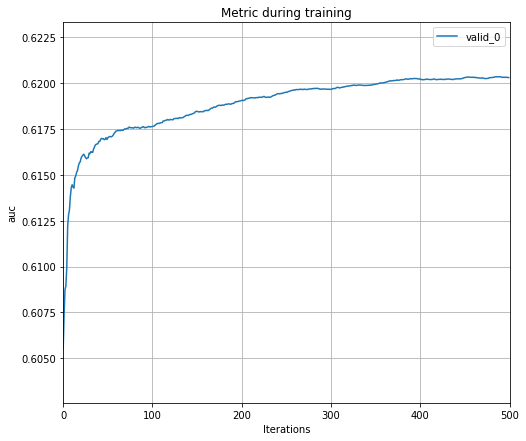

<Figure size 432x288 with 0 Axes>

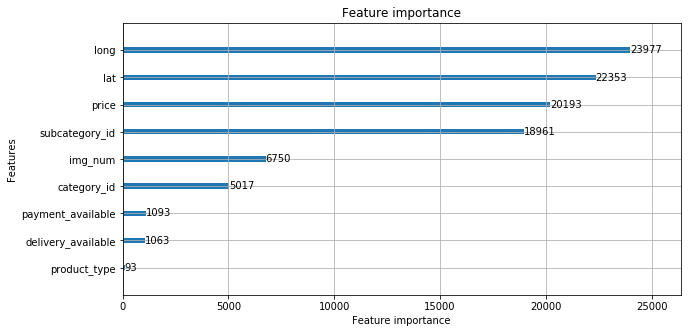

ROC AUC _train = 0.6796101362365947
ROC AUC _test = 0.6203132069406602


In [60]:
baseling_gbm, evals = test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=(baseling_gbm, evals))

## Model with sold mode

In [62]:
drop_cols = ['city', 'date_created', 'desc_text', 'name_text',
             'owner_id', 'product_id', 'properties', 'region',
            'month', 'day', 'weekday', 'desc_price', 'has_desc_price', 'init_title_len',
       'init_description_len', 'pdesc', 'pname', 'properties_str', 'name+desc',
       'fast_txt_all_text', 'ldesc', 'lname', 'properties_str_len',
       'prep_title_len', 'prep_description_len', 'excelent_condition',
       'good_condition', 'ok_condition', 'as_new_condition',
       'with_defect_condition']

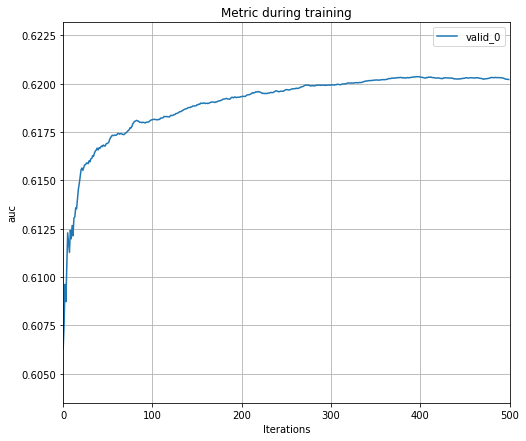

<Figure size 432x288 with 0 Axes>

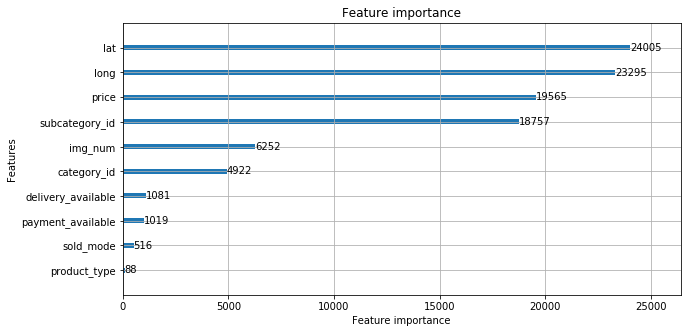

ROC AUC _train = 0.6811968177818364
ROC AUC _test = 0.6202187366976307


In [63]:
soldmode_gbm, evals = test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=None)

## + region

/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


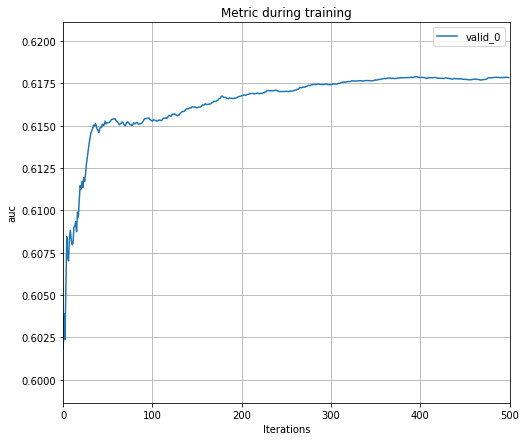

<Figure size 432x288 with 0 Axes>

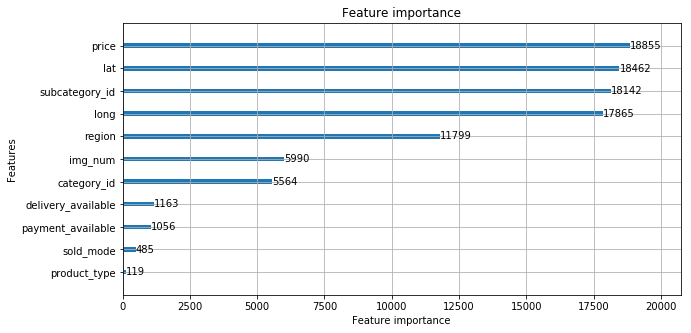

ROC AUC _train = 0.686193122596634
ROC AUC _test = 0.6178501812337901


In [75]:
drop_cols = ['city', 'date_created', 'desc_text', 'name_text',
             'owner_id', 'product_id', 'properties',
            'month', 'day', 'weekday', 'desc_price', 'has_desc_price', 'init_title_len',
       'init_description_len', 'pdesc', 'pname', 'properties_str', 'name+desc',
       'fast_txt_all_text', 'ldesc', 'lname', 'properties_str_len',
       'prep_title_len', 'prep_description_len', 'excelent_condition',
       'good_condition', 'ok_condition', 'as_new_condition',
       'with_defect_condition']

region_gbm, evals = test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=None)

## - region + sold_mode + owner_id

/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


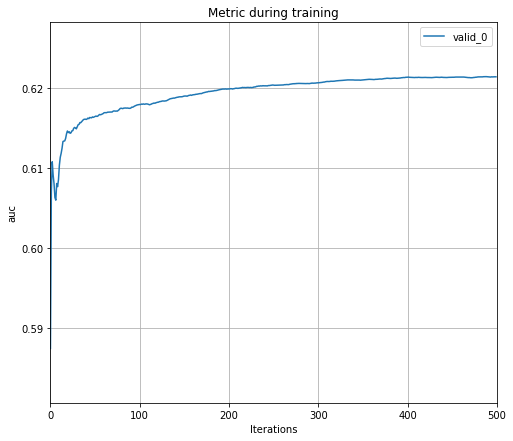

<Figure size 432x288 with 0 Axes>

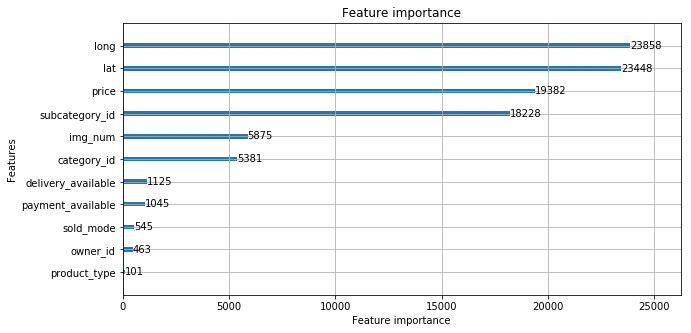

ROC AUC _train = 0.6800404891740464
ROC AUC _test = 0.6214282050299162


In [78]:
drop_cols = ['city', 'date_created', 'desc_text', 'name_text',
              'product_id', 'properties', 'region', 
            'month', 'day', 'weekday', 'desc_price', 'has_desc_price', 'init_title_len',
       'init_description_len', 'pdesc', 'pname', 'properties_str', 'name+desc',
       'fast_txt_all_text', 'ldesc', 'lname', 'properties_str_len',
       'prep_title_len', 'prep_description_len', 'excelent_condition',
       'good_condition', 'ok_condition', 'as_new_condition',
       'with_defect_condition']

owner_gbm, evals = test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=None)

## - region + sold_mode + owner_id + weekday

/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


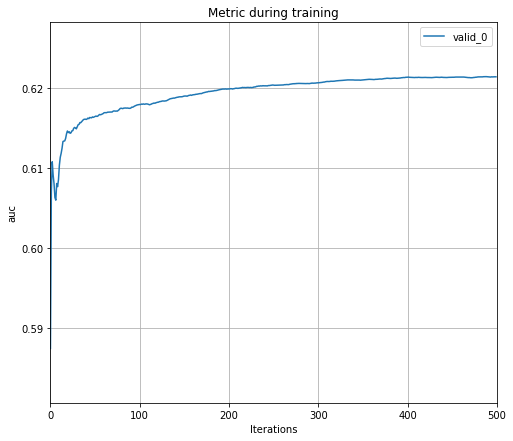

<Figure size 432x288 with 0 Axes>

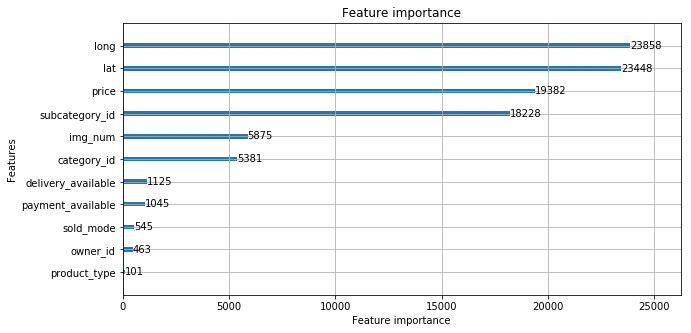

ROC AUC _train = 0.6800404891740464
ROC AUC _test = 0.6214282050299162


In [84]:
drop_cols = ['city', 'date_created', 'desc_text', 'name_text',
              'product_id', 'properties', 'region', 
            'month', 'day', 'weekday', 'desc_price', 'has_desc_price', 'init_title_len',
       'init_description_len', 'pdesc', 'pname', 'properties_str', 'name+desc',
       'fast_txt_all_text', 'ldesc', 'lname', 'properties_str_len',
       'prep_title_len', 'prep_description_len', 'excelent_condition',
       'good_condition', 'ok_condition', 'as_new_condition',
       'with_defect_condition']

owner_gbm, evals = test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=None)

# + text legths

/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


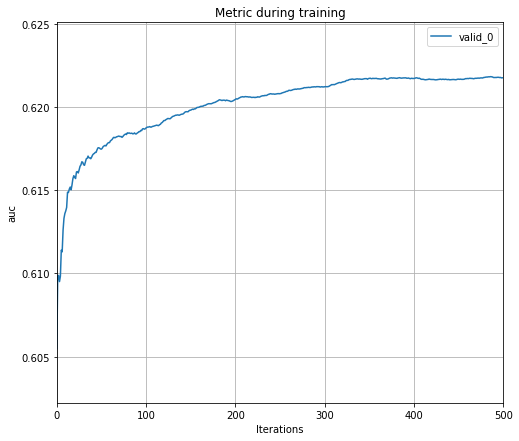

<Figure size 432x288 with 0 Axes>

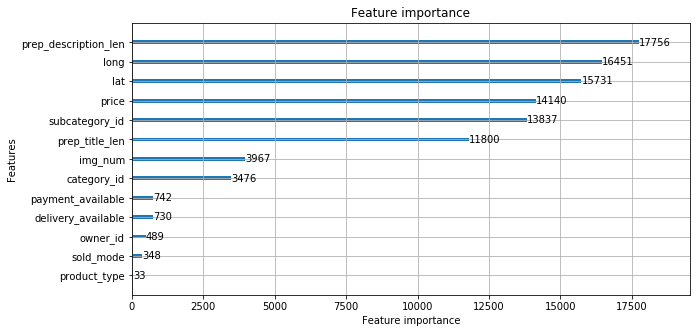

ROC AUC _train = 0.6974624847146448
ROC AUC _test = 0.621752641453587


In [82]:
drop_cols = ['city', 'date_created', 'desc_text', 'name_text',
              'product_id', 'properties', 'region', 
            'month', 'day', 'weekday', 'desc_price', 'has_desc_price', 'init_title_len',
       'init_description_len', 'pdesc', 'pname', 'properties_str', 'name+desc',
       'fast_txt_all_text', 'ldesc', 'lname', 'properties_str_len',
        'excelent_condition',
       'good_condition', 'ok_condition', 'as_new_condition',
       'with_defect_condition']

len_gbm, evals = test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=None)

# conditions

/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


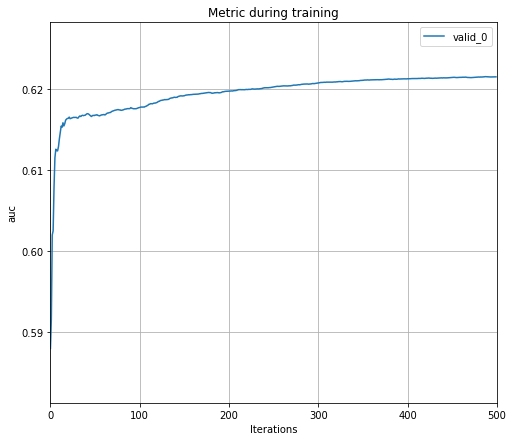

<Figure size 432x288 with 0 Axes>

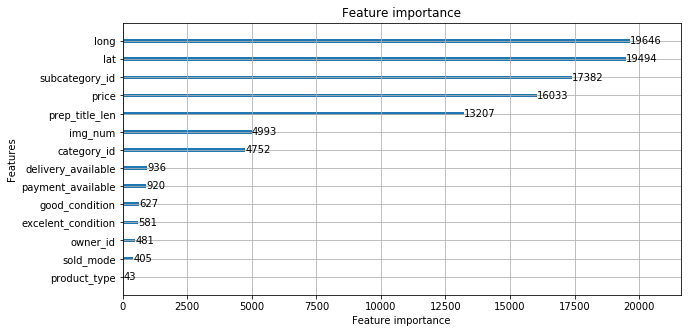

ROC AUC _train = 0.6881786597232581
ROC AUC _test = 0.6214737587050312


In [89]:
drop_cols = ['city', 'date_created', 'desc_text', 'name_text',
              'product_id', 'properties', 'region', 
            'month', 'day', 'weekday', 'desc_price', 'has_desc_price', 'init_title_len',
       'init_description_len', 'pdesc', 'pname', 'properties_str', 'name+desc',
       'fast_txt_all_text', 'ldesc', 'lname', 'properties_str_len',
        'prep_description_len',  'ok_condition', 'as_new_condition',
       'with_defect_condition']

cond_gbm, evals = test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=None)

## All

/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


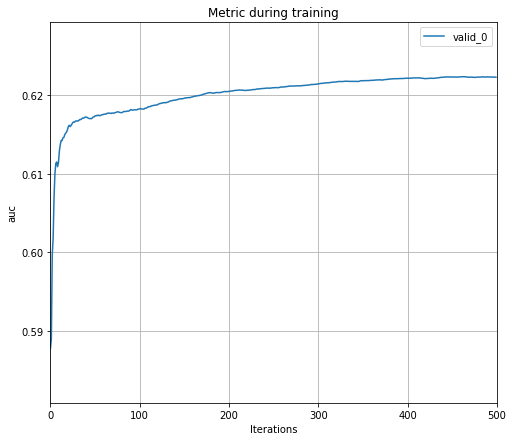

<Figure size 432x288 with 0 Axes>

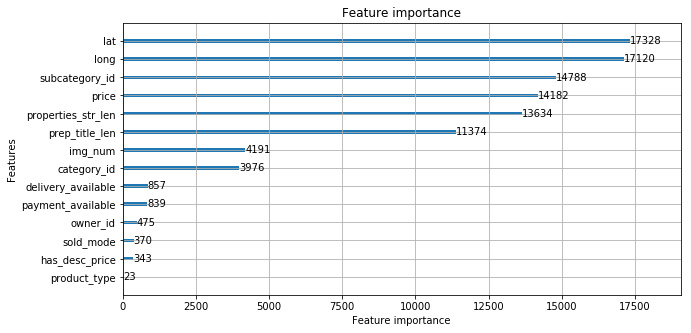

ROC AUC _train = 0.6934640566037025
ROC AUC _test = 0.6223033536624749


In [96]:
drop_cols = ['city', 'date_created', 'desc_text', 'name_text',
              'product_id', 'properties', 'region', 
            'month', 'day', 'weekday', 'desc_price',  'init_title_len',
       'init_description_len', 'pdesc', 'pname', 'properties_str', 'name+desc',
       'fast_txt_all_text', 'ldesc', 'lname', 
        'prep_description_len', 'excelent_condition',
       'good_condition',  'ok_condition', 'as_new_condition',
       'with_defect_condition']

cond_gbm, evals = test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=None)

## финальный набор фичей

In [4]:
use_cols = ['category_id', 'delivery_available', 'img_num', 'lat', 'long',
       'payment_available', 'price', 'sold_mode', 'subcategory_id',
       'sold_fast', 'month', 'day', 'weekday', 'has_desc_price',
       'excelent_condition', 'good_condition', 'ok_condition',
       'as_new_condition', 'with_defect_condition', 'owner_id']

## Финальные скоры на отложенной на выбранных фичах

/anaconda3/lib/python3.6/site-packages/lightgbm/basic.py:742: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


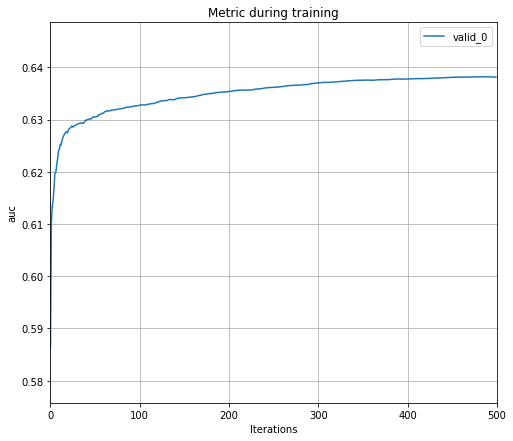

<Figure size 432x288 with 0 Axes>

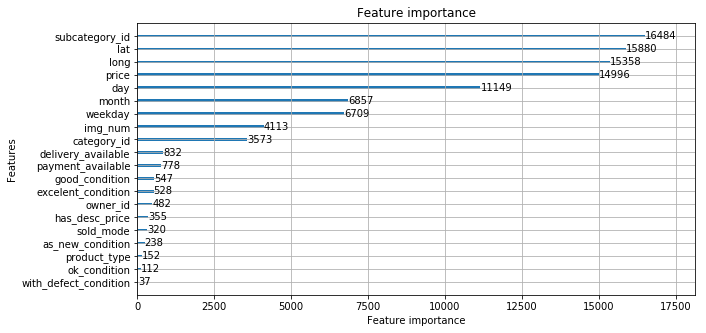

ROC AUC _train = 0.706330383198056
ROC AUC _test = 0.6381213310177702


In [211]:
drop_cols = ['city', 'date_created', 'desc_text', 'name_text',
             'owner_id', 'product_id', 'properties', 'region', 'sold_mode',
            'month', 'day', 'weekday', 'desc_price', 'has_desc_price', 'init_title_len',
       'init_description_len', 'pdesc', 'pname', 'properties_str', 'name+desc',
       'fast_txt_all_text', 'ldesc', 'lname', 'properties_str_len',
       'prep_title_len', 'prep_description_len', 'excelent_condition',
       'good_condition', 'ok_condition', 'as_new_condition',
       'with_defect_condition']


drop_cols = [f for f in drop_cols if f not in use_cols]

stas_gbm, evals = test_model(df, drop_cols, params, n_trees=500, verbose=False, gbm=None)

## doc2vec

### Lemmas

In [149]:
texts = pd.concat((df.ldesc, df_test.ldesc)).reset_index(drop=True)



texts = [str(texts.iloc[i]).split() for i in range(len(texts))]

# text_col = 'ltext'
# X = np.array(ddf[text_col])
# y = np.array(ddf.source)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# !pip install gensim



In [150]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument



tagged_documents = [TaggedDocument(text, [i]) for i, text in enumerate(texts)]
d2v = Doc2Vec(tagged_documents, vector_size=100, window=5, min_count=1, workers=4)



In [151]:
X_train = np.array(df.ldesc)
# X_test = np.array(df_test.ldesc)

X_train_dv = np.array(list(map(lambda x: d2v.infer_vector(str(x).split()), X_train)))
# X_test_dv = np.array(list(map(lambda x: d2v.infer_vector(str(x).split()), X_test)))

In [153]:
text_col = 'ldesc'
X = X_train_dv
y = np.array(df.sold_fast)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [155]:
lgbtrain = lgb.Dataset(X_train, label=y_train)
lgbtest = lgb.Dataset(X_test, label=y_test)


evals = {}
model = lgb.train(params=params
                          , train_set=lgbtrain
                          , num_boost_round=500
                          , valid_sets=lgbtest
                          , evals_result=evals
                          , verbose_eval=True
                         )

[1]	valid_0's auc: 0.5247
[2]	valid_0's auc: 0.530169
[3]	valid_0's auc: 0.530764
[4]	valid_0's auc: 0.529992
[5]	valid_0's auc: 0.532855
[6]	valid_0's auc: 0.53483
[7]	valid_0's auc: 0.536724
[8]	valid_0's auc: 0.537475
[9]	valid_0's auc: 0.537582
[10]	valid_0's auc: 0.5395
[11]	valid_0's auc: 0.540623
[12]	valid_0's auc: 0.541323
[13]	valid_0's auc: 0.542287
[14]	valid_0's auc: 0.542705
[15]	valid_0's auc: 0.542717
[16]	valid_0's auc: 0.542892
[17]	valid_0's auc: 0.543347
[18]	valid_0's auc: 0.543826
[19]	valid_0's auc: 0.544479
[20]	valid_0's auc: 0.544712
[21]	valid_0's auc: 0.544728
[22]	valid_0's auc: 0.544906
[23]	valid_0's auc: 0.545158
[24]	valid_0's auc: 0.54509
[25]	valid_0's auc: 0.545435
[26]	valid_0's auc: 0.545579
[27]	valid_0's auc: 0.546395
[28]	valid_0's auc: 0.546358
[29]	valid_0's auc: 0.546566
[30]	valid_0's auc: 0.546377
[31]	valid_0's auc: 0.546478
[32]	valid_0's auc: 0.546996
[33]	valid_0's auc: 0.547298
[34]	valid_0's auc: 0.547514
[35]	valid_0's auc: 0.547684


[279]	valid_0's auc: 0.559014
[280]	valid_0's auc: 0.559005
[281]	valid_0's auc: 0.559029
[282]	valid_0's auc: 0.559053
[283]	valid_0's auc: 0.559127
[284]	valid_0's auc: 0.559127
[285]	valid_0's auc: 0.559161
[286]	valid_0's auc: 0.559183
[287]	valid_0's auc: 0.559151
[288]	valid_0's auc: 0.55922
[289]	valid_0's auc: 0.559232
[290]	valid_0's auc: 0.559294
[291]	valid_0's auc: 0.559269
[292]	valid_0's auc: 0.55928
[293]	valid_0's auc: 0.55929
[294]	valid_0's auc: 0.559344
[295]	valid_0's auc: 0.559251
[296]	valid_0's auc: 0.559225
[297]	valid_0's auc: 0.559232
[298]	valid_0's auc: 0.559198
[299]	valid_0's auc: 0.559266
[300]	valid_0's auc: 0.559254
[301]	valid_0's auc: 0.559298
[302]	valid_0's auc: 0.559283
[303]	valid_0's auc: 0.559323
[304]	valid_0's auc: 0.559361
[305]	valid_0's auc: 0.55944
[306]	valid_0's auc: 0.559539
[307]	valid_0's auc: 0.559471
[308]	valid_0's auc: 0.559451
[309]	valid_0's auc: 0.559455
[310]	valid_0's auc: 0.55941
[311]	valid_0's auc: 0.559409
[312]	valid_0's

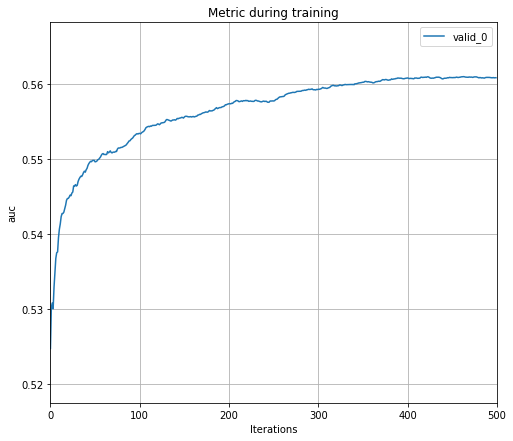

<Figure size 432x288 with 0 Axes>

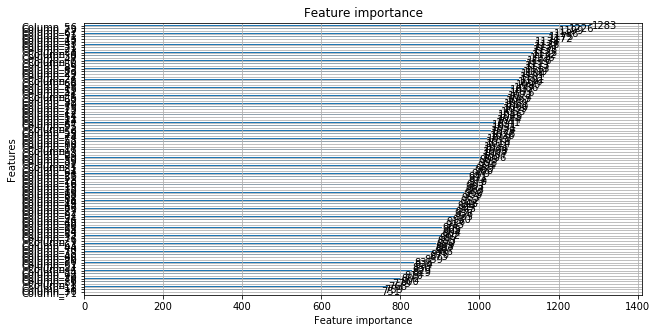

ROC AUC _train = 0.8639148763519489
ROC AUC _test = 0.5608359779950006


In [156]:
ax = lgb.plot_metric(evals, figsize=(8, 7))
plt.show()
    
plt.figure()
ax = lgb.plot_importance(model, figsize=(10, 5))
plt.show()
    
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test) 
    
print('ROC AUC _train = {}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC _test = {}'.format(roc_auc_score(y_test, y_pred)))

### Full texts

In [157]:
texts = pd.concat((df['name+desc'], df_test['name+desc'])).reset_index(drop=True)



texts = [str(texts.iloc[i]).split() for i in range(len(texts))]

# text_col = 'ltext'
# X = np.array(ddf[text_col])
# y = np.array(ddf.source)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# !pip install gensim



In [158]:


tagged_documents_nd = [TaggedDocument(text, [i]) for i, text in enumerate(texts)]
d2v_nd = Doc2Vec(tagged_documents_nd, vector_size=100, window=5, min_count=1, workers=4)



In [212]:
# X_train = np.array(df['name+desc'])
X_test = np.array(df_test['name+desc'])

# X_train_dv = np.array(list(map(lambda x: d2v_nd.infer_vector(str(x).split()), X_train)))
X_test_dv = np.array(list(map(lambda x: d2v_nd.infer_vector(str(x).split()), X_test)))

In [188]:
X_train_f = df.drop(drop_cols+['sold_fast', 'owner_id'], axis=1)

In [178]:
df = df[df.columns[:41]]

In [180]:
X_train_f.shape

(351281, 20)

In [181]:
X_train_dv.shape

(351281, 100)

In [189]:
X_train_f.head()

,category_id,delivery_available,img_num,lat,long,payment_available,price,product_type,sold_mode,subcategory_id,month,day,weekday,has_desc_price,excelent_condition,good_condition,ok_condition,as_new_condition,with_defect_condition
0,4,False,3,45.0686,38.9518,True,500.0,1,1,410,10,8,0,0,False,False,False,False,False
1,4,False,2,57.1840,65.5674,False,300.0,1,1,405,6,18,0,0,False,False,False,False,False
2,9,True,1,54.9889,73.4312,True,1100.0,1,1,908,7,31,1,0,False,False,False,False,False
3,3,False,4,59.9590,30.4877,True,5000.0,1,1,312,4,17,1,0,False,False,False,False,False
4,5,False,2,55.6473,37.4118,True,2000.0,1,1,504,2,9,4,0,False,False,False,False,False


In [190]:
X_tr = np.concatenate((X_train_f, X_train_dv), axis=1)

In [191]:
text_col = 'name+desc'
X = X_tr
y = np.array(df.sold_fast)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [192]:
lgbtrain = lgb.Dataset(X_train, label=y_train)
lgbtest = lgb.Dataset(X_test, label=y_test)


evals = {}
model = lgb.train(params=params
                          , train_set=lgbtrain
                          , num_boost_round=500
                          , valid_sets=lgbtest
                          , evals_result=evals
                          , verbose_eval=True
                         )

[1]	valid_0's auc: 0.597482
[2]	valid_0's auc: 0.604529
[3]	valid_0's auc: 0.603255
[4]	valid_0's auc: 0.60628
[5]	valid_0's auc: 0.61164
[6]	valid_0's auc: 0.615195
[7]	valid_0's auc: 0.615501
[8]	valid_0's auc: 0.616497
[9]	valid_0's auc: 0.617334
[10]	valid_0's auc: 0.61739
[11]	valid_0's auc: 0.61847
[12]	valid_0's auc: 0.61977
[13]	valid_0's auc: 0.61973
[14]	valid_0's auc: 0.620343
[15]	valid_0's auc: 0.620914
[16]	valid_0's auc: 0.620897
[17]	valid_0's auc: 0.62153
[18]	valid_0's auc: 0.622
[19]	valid_0's auc: 0.622275
[20]	valid_0's auc: 0.621793
[21]	valid_0's auc: 0.622145
[22]	valid_0's auc: 0.622619
[23]	valid_0's auc: 0.623297
[24]	valid_0's auc: 0.623298
[25]	valid_0's auc: 0.623612
[26]	valid_0's auc: 0.623745
[27]	valid_0's auc: 0.623786
[28]	valid_0's auc: 0.623689
[29]	valid_0's auc: 0.623797
[30]	valid_0's auc: 0.623969
[31]	valid_0's auc: 0.62395
[32]	valid_0's auc: 0.624517
[33]	valid_0's auc: 0.624574
[34]	valid_0's auc: 0.624787
[35]	valid_0's auc: 0.625205
[36]	

[280]	valid_0's auc: 0.630594
[281]	valid_0's auc: 0.630632
[282]	valid_0's auc: 0.630684
[283]	valid_0's auc: 0.6307
[284]	valid_0's auc: 0.630688
[285]	valid_0's auc: 0.630745
[286]	valid_0's auc: 0.630755
[287]	valid_0's auc: 0.630763
[288]	valid_0's auc: 0.630833
[289]	valid_0's auc: 0.630838
[290]	valid_0's auc: 0.630829
[291]	valid_0's auc: 0.63085
[292]	valid_0's auc: 0.630854
[293]	valid_0's auc: 0.630831
[294]	valid_0's auc: 0.630865
[295]	valid_0's auc: 0.63088
[296]	valid_0's auc: 0.630888
[297]	valid_0's auc: 0.630893
[298]	valid_0's auc: 0.630913
[299]	valid_0's auc: 0.630907
[300]	valid_0's auc: 0.63091
[301]	valid_0's auc: 0.630913
[302]	valid_0's auc: 0.630931
[303]	valid_0's auc: 0.630933
[304]	valid_0's auc: 0.63092
[305]	valid_0's auc: 0.630939
[306]	valid_0's auc: 0.630931
[307]	valid_0's auc: 0.630926
[308]	valid_0's auc: 0.63093
[309]	valid_0's auc: 0.630904
[310]	valid_0's auc: 0.630903
[311]	valid_0's auc: 0.630892
[312]	valid_0's auc: 0.630899
[313]	valid_0's a

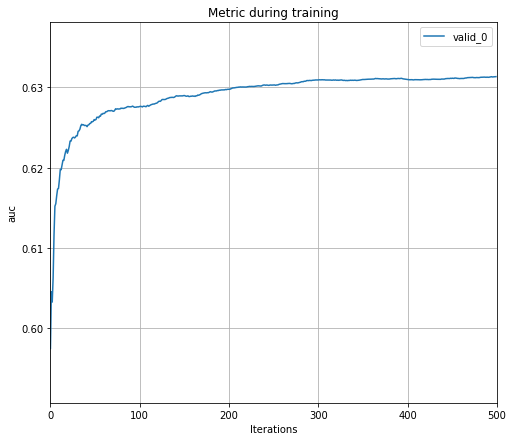

<Figure size 432x288 with 0 Axes>

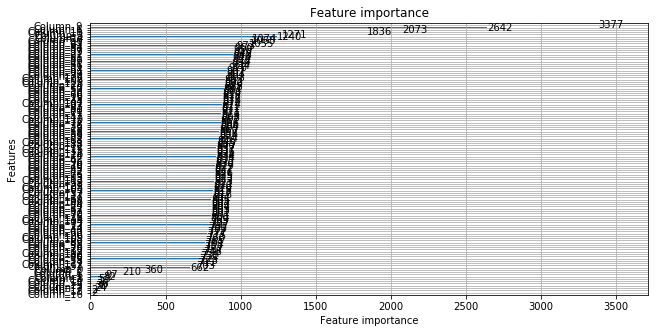

ROC AUC _train = 0.7866587905202418
ROC AUC _test = 0.6313250889914779


In [193]:
ax = lgb.plot_metric(evals, figsize=(8, 7))
plt.show()
    
plt.figure()
ax = lgb.plot_importance(model, figsize=(10, 5))
plt.show()
    
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test) 
    
print('ROC AUC _train = {}'.format(roc_auc_score(y_train, y_pred_train)))
print('ROC AUC _test = {}'.format(roc_auc_score(y_test, y_pred)))

## Pipeline

In [203]:
from sklearn.model_selection import KFold

def cross_validation_score(estimator, X, y, scorer=roc_auc_score, n_splits=3):
    scores = []
    kf = KFold(n_splits=n_splits)
    kf.get_n_splits(X)
    for train_index, test_index in tqdm(kf.split(X), total=n_splits):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        scores.append(scorer(y_test, estimator.predict_proba(X_test)[:, 1]))
        
    return np.array(scores)

In [204]:
class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.

    The data is expected to be stored in a 2D data structure, where the first
    index is over features and the second is over samples.  i.e.

    >> len(data[key]) == n_samples

    Please note that this is the opposite convention to scikit-learn feature
    matrixes (where the first index corresponds to sample).

    ItemSelector only requires that the collection implement getitem
    (data[key]).  Examples include: a dict of lists, 2D numpy array, Pandas
    DataFrame, numpy record array, etc.

    >> data = {'a': [1, 5, 2, 5, 2, 8],
               'b': [9, 4, 1, 4, 1, 3]}
    >> ds = ItemSelector(key='a')
    >> data['a'] == ds.transform(data)

    ItemSelector is not designed to handle data grouped by sample.  (e.g. a
    list of dicts).  If your data is structured this way, consider a
    transformer along the lines of `sklearn.feature_extraction.DictVectorizer`.

    Parameters
    ----------
    key : hashable, required
        The key corresponding to the desired value in a mappable.
    """
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [205]:
def make_pipeline(*args):
    return Pipeline([
        # Use FeatureUnion to combine the features from subject and body
        ('union', FeatureUnion(
            transformer_list=[
                ('selector', ItemSelector(key=numeric_columnns)),
                ('name_desc', Pipeline([
                    ('selector', ItemSelector(key='name_desc')),
                    ('tfidf', TfidfVectorizer(stop_words=stopwords, ngram_range=(1,2))),
                    ('best', TruncatedSVD(n_components=args[0])),
                ])),
            ],
        )),
        # Use a LGBM classifier on the combined features
        ('lgbm', lgb.LGBMClassifier()),
    ])
    

### ===== There were different versions of this pipeline, including...

In [1]:
# This version, that was built on description and extracted properties
# Also, there were versions w/o n_grams, but they had poorlier results
def make_pipeline2(*args):
    return Pipeline([
        # Use FeatureUnion to combine the features from subject and body
        ('union', FeatureUnion(
            transformer_list=[
                ('selector', ItemSelector(key=numeric_columnns)),
                ('desc_text', Pipeline([
                    ('selector', ItemSelector(key='desc_text')),
                    ('tfidf', TfidfVectorizer(stop_words=stopwords, ngram_range=(1,2))),
                    ('best', TruncatedSVD(n_components=args[0])),
                ])),

                ('properties_str', Pipeline([
                    ('selector', ItemSelector(key='properties_str')),
                    ('tfidf', TfidfVectorizer()), 
                    ('best', TruncatedSVD(n_components=args[1]))
                ])),

            ],
        )),

        # Use a LGBM classifier on the combined features
        ('lgbm', lgb.LGBMClassifier()),
    ])
    

### ===== end

In [201]:
target = 'sold_fast'

real_features = list(df_train.columns[(df_train.dtypes == int) | (df_train.dtypes == float)])
bool_features = list(df_train.columns[df_train.dtypes == bool])

cat_features = list(df_train.columns[df_train.dtypes == object]) + ['category_id', 'subcategory_id', 'product_type']
real_features = list(set(real_features) - set(cat_features) - {target})

text_columns = ['desc_text', 'name_text', 'properties']
drop_features = ['owner_id', 'product_id',  'date_created', 'city', 'region']

In [202]:
numeric_columnns = ['delivery_available', 'img_num', 'lat', 'long', 'payment_available', 
                    'price', 'product_type', 'sold_mode', 'month', 'day']

In [197]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

## LGBM...

### on newly generated features -> 0.667 on CV, 0.61760 on public test

In [ ]:
cat_features = [
    'category_id', 'subcategory_id',
    'month', 'day', 'weekday'
]


# There were different sets of these columns, but the best set (accroding to our cross-validation)
# is presendet below
drop_features = ['desc_text', 'name_text', 'owner_id', 'name+desc', 'city', 'region',
                 'product_id', 'properties', 'date_created', 'desc_price', 
                 'pdesc', 'pname', 'ldesc', 'lname', 'product_type', 
                 'properties_str', 'properties_str_len', 'prep_description_len',
                 'prep_title_len', 'init_description_len', 'init_title_len', 'fast_txt_all_text'
                 
                ]


In [ ]:
# make categorical values categorical for LGBMClassifier
for cat in tqdm(cat_features):
    df = pd.concat((df, pd.get_dummies(df[cat], prefix=cat, drop_first=True)), axis=1) 
    df = df.drop(cat, axis=1)


In [ ]:
model = lgb.LGBMClassifier(metric='rmse',
	learning_rate=0.01,
	num_leaves=200,
	feature_fraction=0.70,
	bagging_fraction=0.70,
	bagging_freq=4,
	max_depth=-1,
    verbosity=-1,
	reg_alpha=0.3,
	reg_lambda=0.1,
	#"min_split_gain":0.2,
	min_child_weight=10,
    zero_as_missing=True,
    num_threads=4,)

# model = LogisticRegression() -> 0.4915024422417416 on CV
# model = RandomForestClassifier() -> 0.5873597706863539 on CV

scores = cross_validation_score(model, df_train.drop(drop_features, axis=1).drop(target, axis=1), df_train[target], )
scores, np.mean(scores)

also tried to remove the "bad" months (8 and 9)

mask = (8 <= df_train.month.astype(int)) & (df_train.month.astype(int)< 10)
df_train = df_train[mask] -> 0.6188131668884634 on CV, on 0.61152 on public test



## We also tried to use several models, and take the average of them. This approach was called "Mean Estimator" -> 0.64 on CV, 0.58106 on public test

In [ ]:
class MeanEstimator():
    def __init__(self, estimators):
        self.estimators = estimators
    
    def fit(self, X, y=None, *args, **kwargs):
        for est in self.estimators:
            est.fit(X, y)
            

    def predict_proba(self, X):
        probas = []
        for est in self.estimators:
            probas.append(est.predict_proba(X)[:, 1])
        
        proba = np.column_stack(probas).mean(axis=1)
        return np.column_stack((1-proba, proba))
    

In [ ]:
lgbm = lgb.LGBMClassifier(metric='rmse',
	learning_rate=0.01,
	num_leaves=200,
	feature_fraction=0.70,
	bagging_fraction=0.70,
	bagging_freq=4,
	max_depth=-1,
    verbosity=-1,
	reg_alpha=0.3,
	reg_lambda=0.1,
	#"min_split_gain":0.2,
	min_child_weight=10,
    zero_as_missing=True,
    num_threads=4,)
cbc = CatBoostClassifier(cat_features=cat_features, verbose=0)
rfc = RandomForestClassifier()

estimators_list = [lgbm, cbc, rfc]

In [ ]:
scores = cross_validation_score(MeanEstimator(estimators_list), df_train.drop(drop_features, axis=1).drop(target, axis=1), df_train[target])
scores, np.mean(scores)

## Submission 

In [ ]:
def create_submission(model, X_train, y_train, X_test, product_ids):
    model.fit(X_train, y_train)
    y_proba_test = model.predict_proba(X_test)
    submission_df = pd.DataFrame(np.column_stack((product_ids, y_proba_test[:, 1])), columns=['product_id', 'score'])
    submission_df.to_csv('./data/submission.csv', index=False)


# Model interpretation
Try to interpret your model results
* What **knowledge** does it reveal?